# D1: KAGGLE-HOUSE PRICES 


Importing dependencies. Reading in the data from .csv files. Looking at colum names and describe values of each column.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.columns)
train.describe()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Making a distribution plot for sale prices to see what to expect

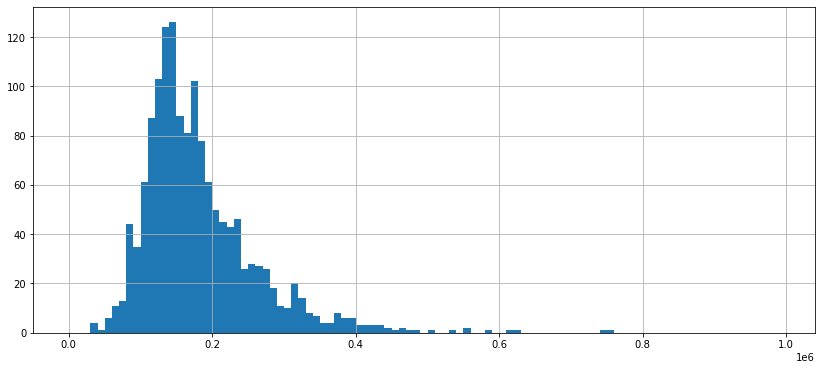

In [2]:
bin_values = np.arange(start=0, stop=1000000, step=10000)
train['SalePrice'].hist(bins=bin_values, figsize=[14,6])

Finding attributes absolute correlations with sale price and showing top 10 that affect sale price the most

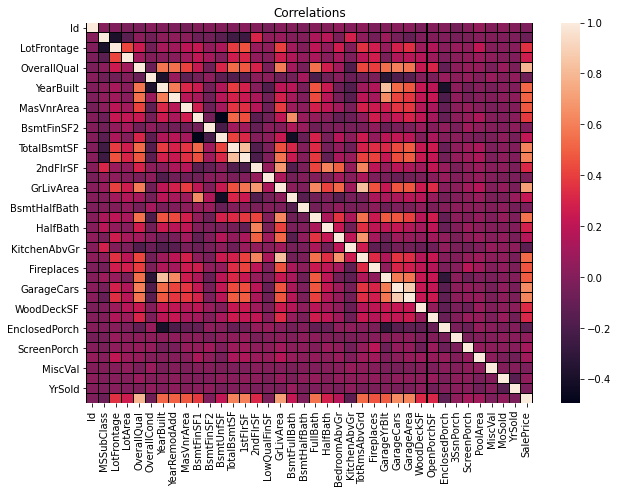

In [3]:
corr = train.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,linewidths=0.01,linecolor='k')
plt.title('Correlations')
plt.show()

In [4]:
correlations = corr.abs()['SalePrice']
correlations = correlations.drop(labels=['Id', 'SalePrice'])
correlations.sort_values(ascending=False).head(10)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Making scatter plots for the top 10 absolute correlations

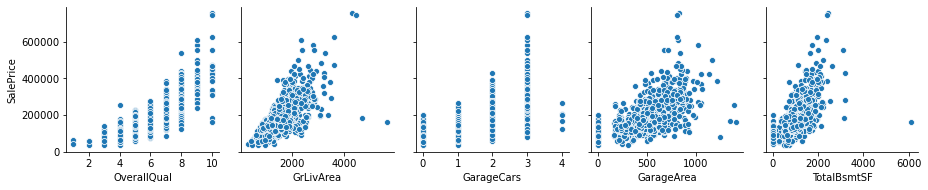

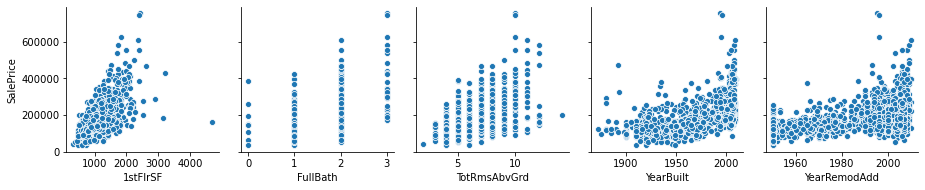

In [5]:
sns.pairplot(train,x_vars=['OverallQual','GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF'],y_vars=["SalePrice"],kind='scatter')
sns.pairplot(train,x_vars=['1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd'],y_vars=["SalePrice"],kind='scatter')


One hot encoding our test and train data to make it even.

In [6]:
df1 = train.copy() 
df1['source'] = 'train'

df2 = test.copy() 
df2['source'] = 'test'

# TODO
data = pd.concat([df1,df2])

data[data.select_dtypes('object').columns]=data.select_dtypes('object').replace(np.NaN,'NO')

print(data.columns[data.isna().any()].tolist())    
imputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
imputer = imputer.fit(data[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']])
data[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']] = imputer.transform(data[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']])  
    
data_dum = pd.get_dummies(data, columns=data.drop(columns=['source']).select_dtypes('object').columns)
data_dum

train = data_dum.loc[data_dum['source'] == 'train'].drop(columns=['source'])
test = data_dum.loc[data_dum['source'] == 'test'].drop(columns=['source'])


['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [8]:
pd.set_option('display.max_columns', 290)

X_train = train.drop(columns=['SalePrice'])
y_train = train.SalePrice
X_test=test.drop(columns=['SalePrice'])

rf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0).fit(X_train, y_train)
y_test=rf.predict(X_test)

probs=pd.DataFrame(y_test)
probs['Id']= np.arange(len(X_train)+1, len(X_train)+len(y_test)+1)
probs.columns = ['SalePrice', 'Id']
probs=probs.reindex(columns=['Id','SalePrice'])
probs.to_csv("RandomForestClasssifier.csv", index=False)

rg = RandomForestRegressor(bootstrap=True,max_depth=25,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=1000,random_state=42).fit(X_train, y_train)
y_test1=rg.predict(X_test)

probs1=pd.DataFrame(y_test1)
probs1['Id']= np.arange(len(X_train)+1, len(X_train)+len(y_test1)+1)
probs1.columns = ['SalePrice', 'Id']
probs1=probs1.reindex(columns=['Id','SalePrice'])
probs1.to_csv("RandomForestRegressor.csv", index=False)
